In [1]:
## Import packages
import pandas as pd
import numpy as np
import plotly
from sqlalchemy import create_engine
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import lxml
import plotly.express as px

In [2]:
## Read covid and measure lookup data
engine = create_engine('sqlite:///%s' % '../data/coviddb')
df = pd.read_sql_table('Covid100', engine)
lookup = pd.read_sql_table('MeasureLookup', engine)

In [3]:
## Get measures summary
categories = lookup.groupby('Category').agg({'MeasureId': 'count'})
categories

,MeasureId
Category,
Health Outcomes,13
Prevention,10
Unhealthy Behaviors,5


In [4]:
## Measure overview
lookup

,MeasureId,Measure,Short_Question_Text,Category
0,BPHIGH,High blood pressure among adults aged >=18 Years,High Blood Pressure,Health Outcomes
1,CHOLSCREEN,Cholesterol screening among adults aged >=18 Y...,Cholesterol Screening,Prevention
2,HIGHCHOL,High cholesterol among adults aged >=18 Years ...,High Cholesterol,Health Outcomes
3,BPMED,Taking medicine for high blood pressure contro...,Taking BP Medication,Prevention
4,TEETHLOST,All teeth lost among adults aged >=65 Years,Teeth Loss,Health Outcomes
5,STROKE,Stroke among adults aged >=18 Years,Stroke,Health Outcomes
6,OBESITY,Obesity among adults aged >=18 Years,Obesity,Unhealthy Behaviors
7,ARTHRITIS,Arthritis among adults aged >=18 Years,Arthritis,Health Outcomes
8,CASTHMA,Current asthma among adults aged >=18 Years,Current Asthma,Health Outcomes
9,DIABETES,Diagnosed diabetes among adults aged >=18 Years,Diabetes,Health Outcomes


In [5]:
df.shape

(497, 38)

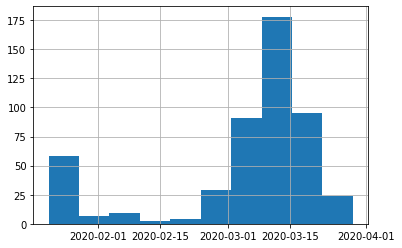

In [6]:
## First covid case dates
df['first_date'].hist()

In [7]:
df.head()

,CityName,county_fips,state_id,density,ACCESS2,ARTHRITIS,BINGE,BPHIGH,BPMED,CANCER,...,PHLTH,SLEEP,STROKE,TEETHLOST,first_date,case1m,death1m,county_fips_number,case14,death14
0,Abilene,48441,TX,441.0,22.60,24.30,17.60,31.10,68.00,5.90,...,13.30,33.55,3.25,15.65,2020-03-27,4747.563644,48.444527,48441.0,1711.706620,8.074088
1,Akron,39153,OH,1233.0,12.40,28.95,15.45,36.40,71.70,6.05,...,15.15,43.15,4.15,21.55,2020-03-14,2094.339401,237.672224,39153.0,245.908390,21.178713
2,Alameda,6001,CA,2927.0,7.50,17.90,17.85,24.80,63.00,5.85,...,9.05,33.70,2.20,7.50,2020-03-01,2421.669041,66.496154,6001.0,603.905984,10.276678
3,Berkeley,6001,CA,4509.0,7.40,16.55,19.20,22.70,61.00,5.45,...,8.60,32.35,2.10,6.75,2020-03-01,2421.669041,66.496154,6001.0,603.905984,10.276678
4,Fremont,6001,CA,1171.0,7.65,15.15,16.75,22.85,61.85,5.00,...,7.75,34.30,1.75,6.75,2020-03-01,2421.669041,66.496154,6001.0,603.905984,10.276678


In [8]:
## Get correlation matrix for health measures
cm = df.corr()[['death1m']][2:-5]

In [9]:
## Show correlations with death per 1M
fig = px.bar(x=cm.index, y=cm)
fig.update_layout(xaxis_tickangle=-45,\
    title='Measure Correlations with death1m',\
        xaxis_title='Measure',\
            yaxis_title = 'Corr')
fig.show()

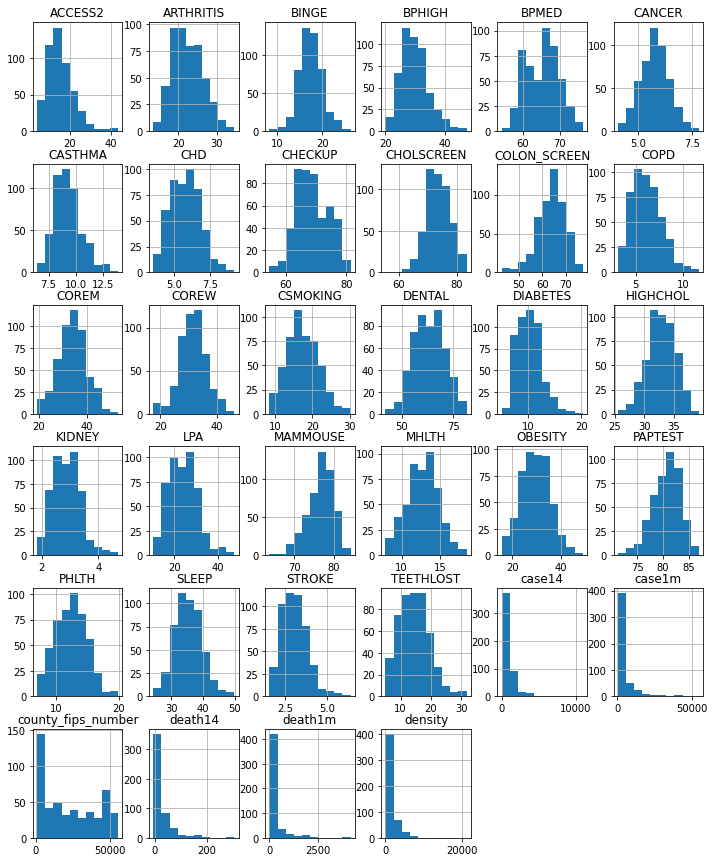

In [10]:
## View variable distributions
df.iloc[:,3:].hist(figsize = (12,15));

In [11]:
## Set X, y and split into train and test data set
X = df.drop(columns = ['county_fips','CityName','state_id','case1m', 'death1m','PAPTEST','first_date','county_fips_number','case14','death14'])
y = df['death1m']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 42)

In [12]:
##Train the model using OLS
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est = est.fit()
print(est.summary().tables[0])

OLS Regression Results                            
Dep. Variable:                death1m   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     13.78
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           7.04e-40
Time:                        16:35:53   Log-Likelihood:                -2542.1
No. Observations:                 347   AIC:                             5142.
Df Residuals:                     318   BIC:                             5254.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         


In [13]:
## Get significant variables
p = est.pvalues
significant_vars = p.loc[p < 0.05].index.tolist()
significant_vars.remove('const')

ols_coef = pd.read_html(est.summary().tables[1].as_html(),header=0,index_col=0)[0]
ols_coef.loc[ols_coef['P>|t|'] < 0.05]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-3669.9698,1476.558,-2.485,0.013,-6575.027,-764.913
density,0.0700,0.017,4.016,0.000,0.036,0.104
ARTHRITIS,54.2767,22.847,2.376,0.018,9.325,99.228
CANCER,-301.1822,128.983,-2.335,0.020,-554.950,-47.414
CASTHMA,101.4600,39.344,2.579,0.010,24.053,178.867
CHECKUP,34.2346,12.075,2.835,0.005,10.478,57.991
COPD,-214.9018,81.553,-2.635,0.009,-375.353,-54.451
COREM,-20.6168,6.596,-3.126,0.002,-33.593,-7.640
DENTAL,28.2716,9.632,2.935,0.004,9.322,47.221
DIABETES,-220.0813,49.898,-4.411,0.000,-318.253,-121.910


In [14]:
## Predict on test data
r2 = r2_score(y_test, est.predict(sm.add_constant(X_test)))
print('r2-score on test data: ', round(r2,4))

r2-score on test data:  0.2356


In [15]:
## List significant variables
pd.set_option('display.max_colwidth', -1)
lookup.loc[lookup['MeasureId'].isin(significant_vars)][['MeasureId','Measure', 'Category']].sort_values(by = 'Category')

,MeasureId,Measure,Category
2,HIGHCHOL,High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years,Health Outcomes
7,ARTHRITIS,Arthritis among adults aged >=18 Years,Health Outcomes
8,CASTHMA,Current asthma among adults aged >=18 Years,Health Outcomes
9,DIABETES,Diagnosed diabetes among adults aged >=18 Years,Health Outcomes
17,CANCER,Cancer (excluding skin cancer) among adults aged >=18 Years,Health Outcomes
18,COPD,Chronic obstructive pulmonary disease among adults aged >=18 Years,Health Outcomes
21,DENTAL,Visits to dentist or dental clinic among adults aged >=18 Years,Prevention
23,CHECKUP,Visits to doctor for routine checkup within the past Year among adults aged >=18 Years,Prevention
27,COREM,"Older adult men aged >=65 Years who are up to date on a core set of clinical preventive services: Flu shot past Year, PPV shot ever, Colorectal cancer screening",Prevention
15,LPA,No leisure-time physical activity among adults aged >=18 Years,Unhealthy Behaviors


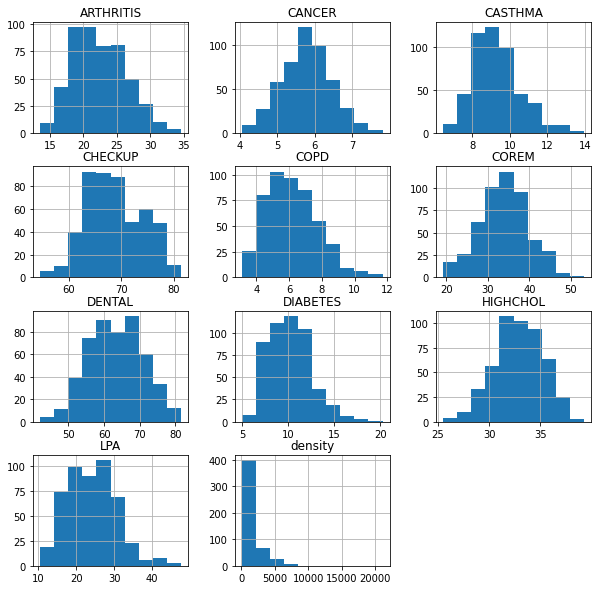

In [16]:
## plot significant variables
df[significant_vars].hist(figsize = (10,10));

In [17]:
## Plot checkup/death 1M
fig = px.scatter(df, x = 'CHECKUP', y = 'death1m', hover_name="state_id", hover_data=["state_id", "CityName"])
fig.show()